## Problem set 4

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1 (10 points)

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures). You saw in the previous problem set that it contains a large amount of missing values. Describe why you would or wouldn't use the below techniques to handle the missing values in this dataset. Use code to support your argument and write a paragraph or two of text answer for each method. The csv file is located in the data folder.

**1. Drop the columns with missing values:**

In [2]:
# your code here 
import pandas as pd
df = pd.read_csv('data\Postures.csv', na_values = '?')
print(df.head)

<bound method NDFrame.head of        Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1     

In [3]:
new_df= df.dropna(axis=1)
print(new_df.head)

<bound method NDFrame.head of        Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1     

I would not drop the columns with missing values because there are certain rows in most columns that have a missing value which would result in the loss of a significant amount of data that we may want to work with. Deleting data without knowing the weight of its contribution to your models predictions can lead to a very bad prediction by your model. This can cause a bad representation of your data and your model may not work effectively. In order for this to work you should evaluate each column for its importance towards the overall prediction power of your model.

**2. Drop the rows with missing values:**

In [4]:
# your code here
new_df2= df.dropna(axis=0)
print(new_df2.head())
#printing makes the pdf too long

       Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
15303      2     2  27.418588  148.216120  14.770587  49.129027   99.723134   
15304      2     2  99.817462   65.686670 -55.457478  57.653306  152.188853   
36818      2     9  71.944991  135.565802 -27.782710  86.536958   66.145021   
36819      2     9  86.346749   66.590273 -38.629277  71.496851   90.724686   

              Z1         X2          Y2  ...         Z8          X9  \
0       0.000000   0.000000    0.000000  ...   0.000000    0.000000   
15303   0.883278  92.301344   43.900549  ...   7.015468  100.841332   
15304   6.644935  92.276726   43.845759  ...  14.037669   -1.211737   
36818 -39.206386  30.328132  102.824000  ...   2.384311   16.416635   
36819 -28.165732  51.263880   99.415833  ... -12.430796   78.022520   

               Y9         Z9        X10        Y10        Z10        X11  \
0        0.000000   0.

I would not do it this way because we basically got rid of most of the dataset. In order for this to work we could adjust it so that it will only drop rows that have more than half of their data missing to ensure that we aren't losing a good amount of data. We can evaluate it this way to see how it impacts the prediting power of our model and determine if any of the values removed were imperative to ensure the model works properl.

**3. Mean or median imputation:**

In [5]:
# your code here
new_df3= df.fillna(df.median())
print (new_df3)

       Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

Although this technique does not lead to a significant loss of data it could potentially lead to issues as you are replacing the missing values with a number and that can introduce errors into your dataset. Mean or median imputation decreases the variance of the feature. They also shrink standard errors, which can negate your hypothesis test and the calculation of confidence interval. It also cannot preserve correlation relationships in your data leading to a potential misrepresentation of your data. 

### Problem 2a (5 points)

Load the diabetes dataset using this [URL](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Split and preprocess the dataset as we discussed in class. 

In [6]:
import pandas as pd
df4 = pd.read_csv('diabetes dataset.txt', delimiter='\t')
print(df4.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [7]:
pd.set_option('display.max_rows', 442)
print((df4.dtypes))

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


In [8]:
#target variable (Y)
disease_progression = df4.value_counts('Y')
print(disease_progression.head())
print(df4.head())

Y
200    6
72     6
90     5
178    5
71     5
Name: count, dtype: int64
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [9]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split 

# let's separate the feature matrix X, and target variable y
y = df4['Y'] #we want to predict diesease progression
X = df4.loc[:, df4.columns != 'Y'] # all other columns are features
print(y.head())
print(X.head())

0    151
1     75
2    141
3    206
4    135
Name: Y, dtype: int64
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80


In [10]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = random_state) #if you rerun the code you want to produce exact results
#neeed randomstate to make sure same points align 
print('training set:',X_train.shape, y_train.shape) 
print(X_other.shape, y_other.shape)
# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) 
print('test set:',X_test.shape, y_test.shape) 
print(X_train.shape[0]/X.shape[0])
print(X_test.shape[0]/X.shape[0])
print(X_val.shape[0]/X.shape[0])
print(X_train.head())
print(X_val.head())
print(X_test.head())

training set: (265, 10) (265,)
(177, 10) (177,)
validation set: (88, 10) (88,)
test set: (89, 10) (89,)
0.5995475113122172
0.20135746606334842
0.19909502262443438
     AGE  SEX   BMI     BP   S1     S2    S3   S4      S5   S6
249   45    1  32.0  110.0  224  134.2  45.0  5.0  5.4116   93
250   67    1  31.6  116.0  179   90.4  41.0  4.0  5.4723  100
59    66    2  24.0   98.0  236  146.4  58.0  4.0  5.0626   96
111   54    1  26.8   87.0  206  122.0  68.0  3.0  4.3820   80
204   79    2  27.0  103.0  169  110.8  37.0  5.0  4.6634  110
     AGE  SEX   BMI    BP   S1     S2    S3   S4      S5  S6
285   52    1  24.5  90.0  198  129.0  29.0  7.0  5.2983  86
255   49    1  20.3  93.0  184  103.0  61.0  3.0  4.6052  93
370   54    1  21.0  78.0  188  107.4  70.0  3.0  3.9703  73
349   49    2  21.0  82.0  119   85.4  23.0  5.0  3.9703  74
57    41    1  20.5  80.0  124   48.8  64.0  2.0  4.0254  75
     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5  S6
116   62    2  31.8  115.00  

In [11]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
std_ftrs = ['AGE','SEX','BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-0.28515826 -0.92365949  1.2132367  ...  0.71609684  1.44129926
   0.11250343]
 [ 1.41297518 -0.92365949  1.12317851 ... -0.05678494  1.55719989
   0.72994089]
 [ 1.3357873   1.08265006 -0.58792703 ... -0.05678494  0.7749184
   0.37711949]
 ...
 [ 0.64109635 -0.92365949 -0.47535429 ... -0.82966671 -0.25768552
  -0.06390727]
 [-0.28515826 -0.92365949 -0.54289793 ... -0.05678494 -0.83489736
  -0.85775544]
 [-1.98329169 -0.92365949  0.5378003  ... -0.82966671 -0.13701139
  -0.06390727]]
[[ 2.55156928e-01 -9.23659490e-01 -4.75354293e-01 -3.43631207e-01
   2.29637405e-01  4.40725953e-01 -1.60504577e+00  2.26186040e+00
   1.22496416e+00 -5.04934034e-01]
 [ 2.35932776e-02 -9.23659490e-01 -1.42096525e+00 -1.28521789e-01
  -1.70529233e-01 -4.10124958e-01  8.33508048e-01 -8.29666714e-01
  -9.84414969e-02  1.12503430e-01]
 [ 4.09532695e-01 -9.23659490e-01 -1.26336342e+00 -1.20406888e+00
  -5.61959079e-02 -2.66134804e-01  1.51935131e+00 -8.29666714e-01
  -1.31072003e+00 -1.65160361e+00]
 [ 2.359

### Problem 2b (10 points)

Read the wiki pages of the [F test](https://en.wikipedia.org/wiki/F-test) and [mutual information](https://en.wikipedia.org/wiki/Mutual_information), and read the manuals of [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html), and [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

Calculate how strong the linear correlation is between each feature and the target variable (disease progression). Prepare a bar plot that shows the top 5 most important features.

Calculate the non-linear correlations with the target variable and plot the top 5 most important features.

Describe the two plots in a paragraph or two. What similarities and differences do you observe?

Prepare a plot which shows the most important feature vs. the target variable!

In [12]:
# linear correlation
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import f_regression, mutual_info_regression
sklearn.feature_selection.f_regression(X, y)
f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)

f score [ 16.10137401   0.81742349 230.65376449 106.52013086  20.71056745
  13.74607917  81.23965868 100.06926441 207.27119362  75.3996832 ]
p values [7.05568615e-05 3.66429295e-01 3.46600645e-42 1.64937205e-22
 6.92071179e-06 2.35984810e-04 6.16286470e-18 2.30425328e-21
 8.82645896e-39 7.58008327e-17]


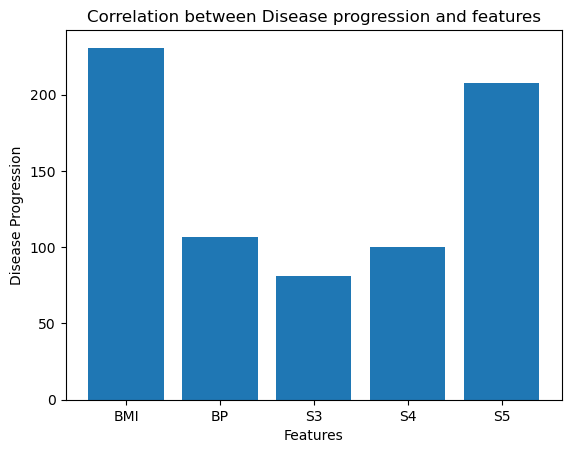

In [13]:
import matplotlib
from matplotlib import pylab as plt
x1=['BMI','BP','S3','S4','S5']
y1= [230.65376449, 106.52013086, 81.23965868, 100.06926441, 207.27119362]
plt.show()
plt.bar(x1, y1)
plt.xlabel('Features')
plt.ylabel("Disease Progression")
plt.title('Correlation between Disease progression and features')
plt.show()

In [19]:
#nonlinear correlation
from sklearn.feature_selection import f_regression, mutual_info_regression
mi = sklearn.feature_selection.mutual_info_regression
#mi = mutual_info_regression(X, y)
print('mi',mi)

mi <function mutual_info_regression at 0x00000166A9966980>


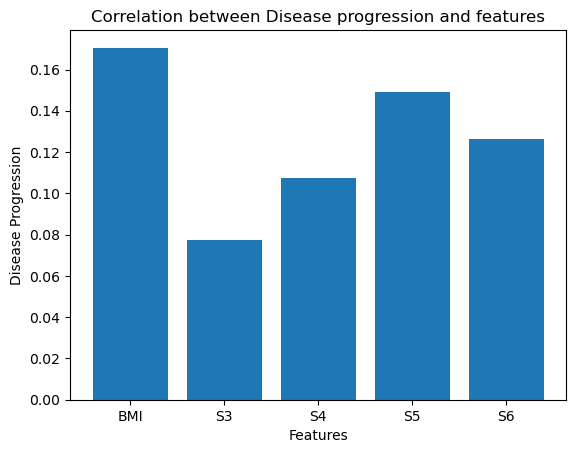

In [15]:
x2=['BMI','S3','S4','S5','S6']
y2= [0.17055425, 0.07739458, 0.10761369, 0.14927158, 0.12626096]
plt.show()
plt.bar(x2, y2)
plt.xlabel('Features')
plt.ylabel("Disease Progression")
plt.title('Correlation between Disease progression and features')
plt.show()

The similarity between the linear and non linear correlations is that BMI is the highest correlated variable to the target variable (disease progression) and S5 is the second highest correlation. This suggests that based on the BMI of the patient we can use that as a prediction factor to determine how the disease might progress. One of the differences I noticed was that BP was highly correlated linearly but not non linearly as S6 replaced it as a highly correlated feature. 

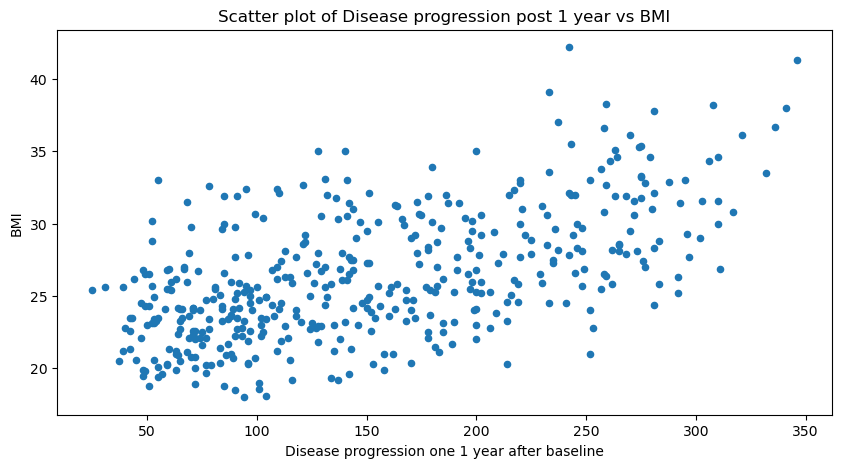

In [16]:
df4.plot.scatter('Y','BMI',figsize=(10,5)) # alpha=0.1,s=10
plt.title('Scatter plot of Disease progression post 1 year vs BMI')
plt.xlabel('Disease progression one 1 year after baseline')
plt.show()

### Problem 3 (10 points)

One EDA step we didn't cover in class is to check how strongly the features correlate with one another. Sometimes you will find strongly correlated or anti-correlated features in your feature matrix (the correlation coefficient is either +1 or -1 or very close to it). If that happens, it is a good idea to remove all but one of the strongly correlated features. This will have no impact on your model's performance, but may speed-up its convergence time.

Using the feature matrix of the diabetes dataset, calculate the Pearson correlation matrix of the features (see method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) and visualize the correlation matrix as a heatmap. Make sure that the feature names are on the x and y axes, add a colorbar to indicate the strength of the correlation. Note that the Pearson correlation coefficient is between -1 and 1 so make sure the color scale is between -1 and 1 on the figure.

Describe in a paragraph which two features have the strongest correlation. Is there a need to potentially remove any of the features?

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.30

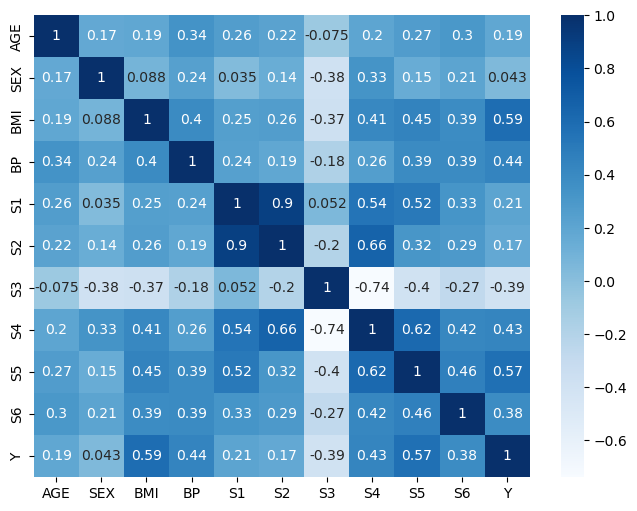

In [17]:
# your code here
import seaborn as sns
plt.figure(figsize=(8,6))
cor = df4.corr()
print (cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

BMI and S5 have the highest have the strongest correlation. 